# Data Exploration

In [1]:
import numpy as np
import scipy.ndimage as ndi
import imageio as imio
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd

# Explore Data

In [2]:
RAW_IMAGES_PATH = '../../data/raw_data/malaria/images/'
BOUNDING_BOX_PATH =  '../../data/raw_data/malaria/'

In [3]:
train_images_paths = os.listdir(RAW_IMAGES_PATH)

In [4]:
train_images_paths

['fe0c5e48-f65e-488c-9c3c-1ea7c7835c0c.png',
 '03359d4d-69cb-4146-8286-ca7399366f97.png',
 '33bdb7b5-ad5b-4a73-bbc2-3350f8c2ac0c.png',
 '49efc89d-9cba-44f7-8257-7f911b73f68a.png',
 '58594235-0d32-4a4e-91cd-4c800eaaaa73.png',
 'f8242b97-b8d5-48b5-b808-0b0f75a5de97.png',
 '3d1429ed-4619-41f7-8ff3-d698ad28034c.png',
 '637957ef-df75-4a7b-86d5-9f6e9c042ca2.png',
 '631340cc-cedf-4bca-a3d8-a0731a5482b4.png',
 '6c3f81d7-5670-46bd-9eaa-9b426413abb7.png',
 '1b7f47fc-26cd-4273-b848-88a7cbfd9f85.png',
 '6274fe0d-0d71-40be-b61b-f0bd5b5df1e2.png',
 'fc15659f-6264-4dd5-ab17-43d89fb297b9.png',
 '446734b7-6bc9-4a66-a3a0-49f6aa90db33.jpg',
 '550cf4ce-b641-44a3-8487-3e16d4049187.png',
 'c6ab535c-30e5-4b6b-8273-1ec8d78cdd13.png',
 '95fea6d8-413f-421e-b331-5d51c31df150.png',
 'f4722a74-35e7-42bd-8ef6-dfff04b9cd22.png',
 '4811fdf2-d7e8-475e-a840-45dda5282bf3.png',
 'b687c30d-cf15-445c-b3f6-5aca86584708.png',
 'b901c906-91be-48c4-88ec-2c527544a258.png',
 'd09eed76-e09b-4d90-b8f0-5a801beae41c.png',
 '604478c7

In [7]:
train_images = []
train_images_gray_scale = []
train_images_shape = []

for i in train_images_paths:
    new_image = imio.imread(RAW_IMAGES_PATH+i)
    train_images.append(new_image)
    train_images_gray_scale.append(new_image[:,:,0])
    train_images_shape.append(new_image.shape)
    

In [8]:
train_images_shape =  np.array(train_images_shape)

### Number of images in data set

In [9]:
len(train_images)

1328

#### Test random image

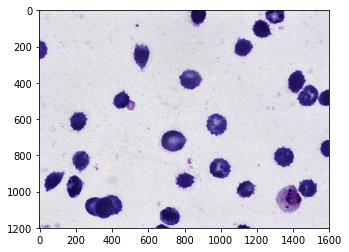

In [10]:
plt.imshow(train_images[5])

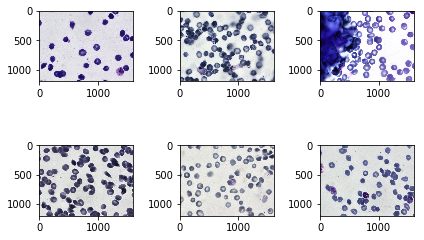

In [11]:
fig, axes = plt.subplots(2,3)
axes[0,0].imshow(train_images[5])
axes[1,0].imshow(train_images[2])

axes[0,1].imshow(train_images[10])
axes[1,1].imshow(train_images[4])

axes[0,2].imshow(train_images[15])
axes[1,2].imshow(train_images[6])


#fig = plt.gcf()
#for ax in fig.axes:
#    ax.axis('off')
plt.tight_layout()
plt.show()

## Images Shape

##### Get percentile, distribution of the height,weigth and area of images

In [12]:
train_images[5].shape

(1200, 1600, 3)

### Heights

In [13]:
heights = train_images_shape[:,0]

In [14]:
print('MEAN     : ' , np.mean(heights))
print('MAX VALUE: ' , np.amax(heights))
print('MIN VALUE: ' , np.amin(heights))
print('PCTL 25% : ' , np.percentile(heights, 25))
print('PCTL 50% : ' , np.percentile(heights, 50))
print('PCTL 75% : ' , np.percentile(heights, 75))

MEAN     :  1216.5361445783133
MAX VALUE:  1383
MIN VALUE:  1200
PCTL 25% :  1200.0
PCTL 50% :  1200.0
PCTL 75% :  1200.0


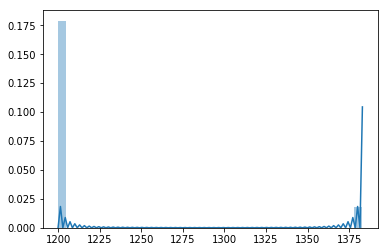

In [15]:
sns.distplot(heights)

### Widths

In [16]:
widths = train_images_shape[:,1]

In [17]:
print('MEAN     : ' , np.mean(widths))
print('MAX VALUE: ' , np.amax(widths))
print('MIN VALUE: ' , np.amin(widths))
print('PCTL 25% : ' , np.percentile(widths, 25))
print('PCTL 50% : ' , np.percentile(widths, 50))
print('PCTL 75% : ' , np.percentile(widths, 75))

MEAN     :  1631.0843373493976
MAX VALUE:  1944
MIN VALUE:  1600
PCTL 25% :  1600.0
PCTL 50% :  1600.0
PCTL 75% :  1600.0


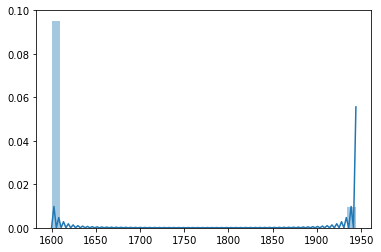

In [18]:
sns.distplot(widths)

# TRANSFORM IMAGES

In [3]:
import os
import sys
import random
import warnings

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

In [4]:
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

## Load TRAIN dataset

In [9]:
train_bounding_box_df = pd.read_json(BOUNDING_BOX_PATH + 'training.json')
train_bounding_box_df['path'] = train_bounding_box_df['image'].map(lambda x: BOUNDING_BOX_PATH + x['pathname'][1:])

print(train_bounding_box_df.shape[0], 'images')
print(train_bounding_box_df.shape[0], 'images available')
train_bounding_box_df.sample(5)

1208 images
1208 images available


,image,objects,path
582,{'checksum': '25a69d00c4e2e46baef9b8ca5ec47479...,"[{'bounding_box': {'minimum': {'r': 356, 'c': ...",../../data/raw_data/malaria/images/71881a39-a3...
725,{'checksum': '6cf7f3c0ed32cc1693de1b497ab366b1...,"[{'bounding_box': {'minimum': {'r': 784, 'c': ...",../../data/raw_data/malaria/images/02fb5e19-6f...
524,{'checksum': '7d2ce35304a4c93984ff9a1544aa4c75...,"[{'bounding_box': {'minimum': {'r': 378, 'c': ...",../../data/raw_data/malaria/images/00c8364b-8c...
374,{'checksum': '89c152a4fdce6e0e440b83cb021e72c2...,"[{'bounding_box': {'minimum': {'r': 431, 'c': ...",../../data/raw_data/malaria/images/5107dcb7-16...
176,{'checksum': '98fd3fb9beec96c297725972b969c358...,"[{'bounding_box': {'minimum': {'r': 1051, 'c':...",../../data/raw_data/malaria/images/dca685a8-a6...


In [6]:
objects = []
for im_index, c_row in train_bounding_box_df.iterrows():
    for c_item in c_row['objects']:
        c_item.update({'im_index':im_index})
        objects.append(dict(image=c_row['path'], **c_item))
        
object_df = pd.DataFrame(objects)


In [7]:
#object_df = pd.DataFrame([dict(image=c_row['path'], **c_item) for im_index, c_row in train_bounding_box_df.iterrows() for c_item in c_row['objects']])
cat_dict = {v:k for k,v in enumerate(object_df['category'].value_counts().index, 1)}
print(object_df['category'].value_counts())
object_df.sample(3)

red blood cell    77420
trophozoite        1473
difficult           441
ring                353
schizont            179
gametocyte          144
leukocyte           103
Name: category, dtype: int64


,bounding_box,category,im_index,image
72734,"{'minimum': {'r': 707, 'c': 819}, 'maximum': {...",red blood cell,1102,../../data/raw_data/malaria/images/caeb2d62-11...
59641,"{'minimum': {'r': 48, 'c': 640}, 'maximum': {'...",red blood cell,917,../../data/raw_data/malaria/images/a2754679-68...
40033,"{'minimum': {'r': 318, 'c': 1184}, 'maximum': ...",red blood cell,625,../../data/raw_data/malaria/images/8a4aadac-cf...


In [8]:
cat_dict

{'red blood cell': 1,
 'trophozoite': 2,
 'difficult': 3,
 'ring': 4,
 'schizont': 5,
 'gametocyte': 6,
 'leukocyte': 7}

## Transform Data

### Parameters

In [5]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
TRANSFORMED_PATH = '../../data/raw_data/malaria/transformed_images/'
GENERATED_MASK_PATH = '../../data/raw_data/malaria/masks/'

In [10]:
# Get and resize train images and masks
total_images = train_bounding_box_df.shape[0]
#X_train = np.zeros((total_images, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#masks_train = np.zeros((total_images, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
X_train = []
masks_train = []

In [11]:
object_df.count()

bounding_box    80113
category        80113
im_index        80113
image           80113
dtype: int64

In [12]:
print('Getting and resizing train images  ... ')
sys.stdout.flush()

for n, row in tqdm(train_bounding_box_df.iterrows(), total=total_images):
    img_path = row['path']
    img = imread( img_path )[:,:,:IMG_CHANNELS]
    
    #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train.append(img)
    masks_train.append( np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8) )
   
    

Getting and resizing train images  ... 


100%|██████████| 1208/1208 [01:13<00:00, 16.50it/s]


In [13]:
print('Generating masks ... ')
sys.stdout.flush()

for n, row in tqdm(object_df.iterrows(), total=object_df.count()):
    #print(row)
    min_val = row['bounding_box']['minimum']
    max_val = row['bounding_box']['maximum']
    im_index = row['im_index']
    
    if(row['category'] in ['trophozoite','ring', 'schizont']) :
        mask =  masks_train[im_index]
        mask[slice(min_val['r'], max_val['r']), slice(min_val['c'], max_val['c'])] = 1
        masks_train[im_index] = mask
   
    

Generating masks ... 


80113it [00:07, 10302.79it/s]                       


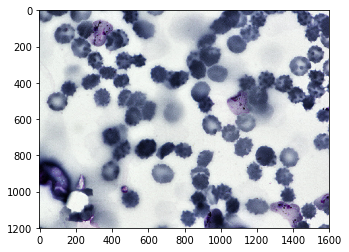

In [14]:
plt.imshow(X_train[0])

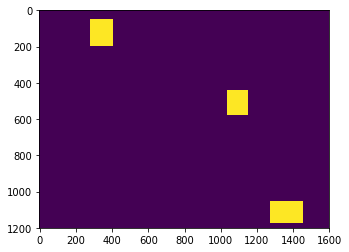

In [15]:
plt.imshow(masks_train[0])

In [16]:
from skimage.color import label2rgb

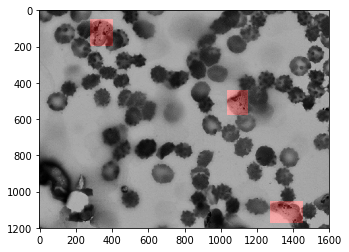

In [17]:
plt.imshow(label2rgb(label=masks_train[0], image=X_train[0], bg_label=0))

## TEST dataset

In [6]:
X_test = []
masks_test = []

In [7]:
test_bounding_box_df = pd.read_json(BOUNDING_BOX_PATH + 'test.json')
test_bounding_box_df['path'] = test_bounding_box_df['image'].map(lambda x: BOUNDING_BOX_PATH + x['pathname'][1:])

print(test_bounding_box_df.shape[0], 'images')
print(test_bounding_box_df.shape[0], 'images available')


120 images
120 images available


In [8]:
objects_test = []
for im_index, c_row in test_bounding_box_df.iterrows():
    for c_item in c_row['objects']:
        c_item.update({'im_index':im_index})
        objects_test.append(dict(image=c_row['path'], **c_item))
        
object_test_df = pd.DataFrame(objects_test)

In [9]:
total_test_images = test_bounding_box_df.shape[0]
total_test_images

120

In [10]:
print('Getting and resizing test images  ... ')
sys.stdout.flush()

for n, row in tqdm(test_bounding_box_df.iterrows(), total=total_test_images):
    img_path = row['path']
    img = imread( img_path )[:,:,:IMG_CHANNELS]
    
    #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test.append(img)
    masks_test.append( np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8) )
   

Getting and resizing test images  ... 


100%|██████████| 120/120 [00:03<00:00, 31.48it/s]


In [11]:
print('Generating test masks ... ')
sys.stdout.flush()
object_test_df_count = object_test_df.shape[0]
for n, row in tqdm(object_test_df.iterrows(), total=object_test_df_count):
    #print(row)
    min_val = row['bounding_box']['minimum']
    max_val = row['bounding_box']['maximum']
    im_index = row['im_index']
    
    if(row['category'] in ['trophozoite','ring', 'schizont']) :
        mask =  masks_test[im_index]
        mask[slice(min_val['r'], max_val['r']), slice(min_val['c'], max_val['c'])] = 1
        masks_test[im_index] = mask

Generating test masks ... 


100%|██████████| 5922/5922 [00:00<00:00, 8908.95it/s]


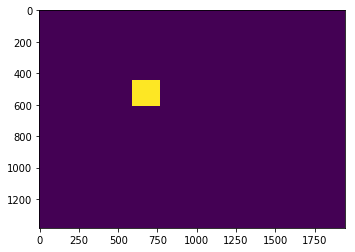

In [30]:
plt.imshow(masks_test[0])

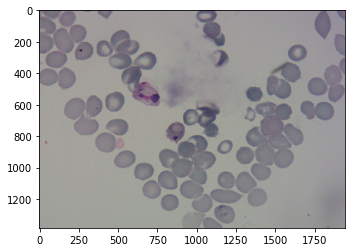

In [12]:
plt.imshow(X_test[0])

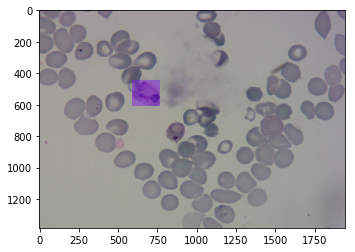

In [20]:
plt.imshow(X_test[0], )    # Also set the cmap to gray
plt.imshow(np.where(masks_test[0]>0, 1, np.nan), cmap='rainbow',alpha=0.4)

## SAVE DATA

### TRAINING DATASET

In [ ]:
np.save(TRANSFORMED_PATH + 'malaria_images_train_transformed', X_train)

In [12]:
np.save(TRANSFORMED_PATH + 'malaria_images', train_bounding_box_df['path'])

In [19]:
np.save(TRANSFORMED_PATH + 'malaria_images_masks', masks_train)

### TEST DATASET

In [ ]:
np.save(TRANSFORMED_PATH + 'malaria_images_test_transformed', X_test)

In [32]:
np.save(TRANSFORMED_PATH + 'malaria_test_images', test_bounding_box_df['path'])

In [31]:
np.save(TRANSFORMED_PATH + 'malaria_images_test_masks', masks_test)